In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import pingouin as pg
from mdi_computation import mdi_compute, smdi_compute
%matplotlib widget

In [4]:
scan_numbers = [15, 24, 30, 48, 64]

compiled_csv_paths = glob.glob("./compiled_spectral_data/*_scan*.csv")
wavenumber = pd.read_csv("./compiled_spectral_data/wavenumber.csv")
scan_15, scan_24, scan_30, scan_48, scan_64 = [
    pd.read_csv(path) for path in compiled_csv_paths
]

scan_number_dataframes = [scan_15, scan_24, scan_30, scan_48, scan_64]

for df in scan_number_dataframes:
    df["average"] = df.mean(axis=1)

<h1 align="center">Visualizing Spectra</h1>

In [5]:
#colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]
colors= ["black"]*5

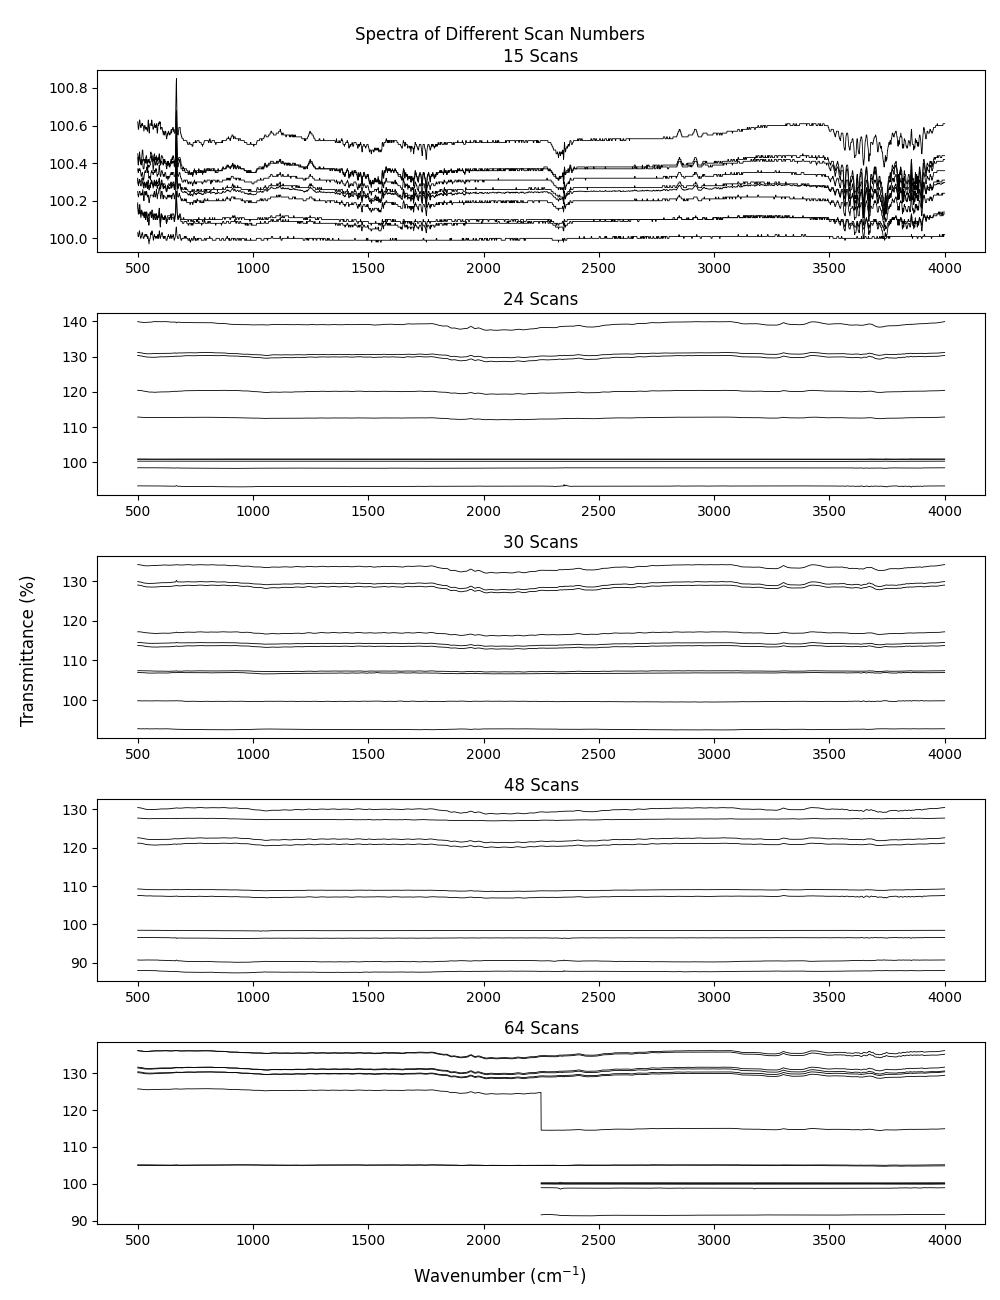

In [10]:
all_scans_fig, asf_axes = plt.subplots(5, 1, figsize=(10, 13))

for axis, number, color, df in zip(
    asf_axes, scan_numbers, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        axis.plot(wavenumber, spectrum, color=color, linewidth=0.6)

    axis.set(title=f"{number} Scans")

all_scans_fig.suptitle("Spectra of Different Scan Numbers")
all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
all_scans_fig.supylabel("Transmittance (%)")

all_scans_fig.tight_layout()

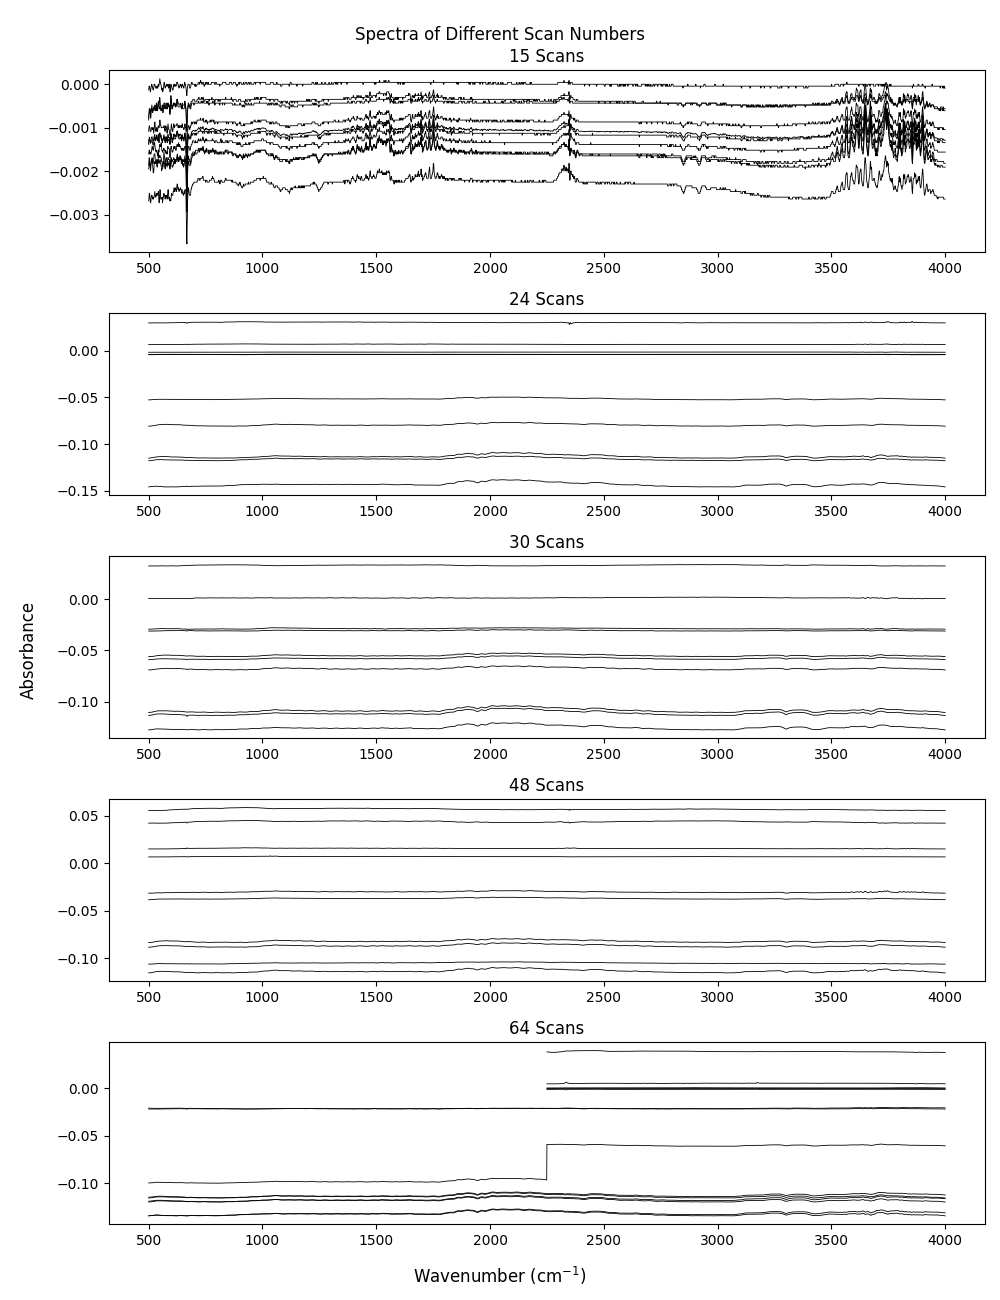

In [16]:
abs_all_scans_fig, asf_axes = plt.subplots(5, 1, figsize=(10, 13))

for axis, number, color, df in zip(
    asf_axes, scan_numbers, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        abs_spectrum = -(np.log10((spectrum/100)))
        axis.plot(wavenumber, abs_spectrum, color=color, linewidth=0.6)

    axis.set(title=f"{number} Scans")

abs_all_scans_fig.suptitle("Spectra of Different Scan Numbers")
abs_all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
abs_all_scans_fig.supylabel("Absorbance")

abs_all_scans_fig.tight_layout()